In [54]:
from IPython.core.display import display, HTML
def PDF(url):
    return HTML('<iframe src=%s width=700 height=350></iframe>' % url)

# Chap 1

In [55]:
PDF("./docs/neuralnetworksanddeeplearning_com_chap1_html.pdf")

# Chap 2

In [276]:
PDF("./docs/neuralnetworksanddeeplearning_com_chap2_html.pdf")

# Chap 3 

In [277]:
PDF("./docs/neuralnetworksanddeeplearning_com_chap3_html.pdf")

# Chap 6 

In [278]:
PDF("./docs/neuralnetworksanddeeplearning_com_chap6_html.pdf")

# Etude à partir d'une librairie python 

On va ici, pour aller plus loin utiliser une librairie Python permettant d'implémenter des réseaux de perceptrons. Il est assez facile de mettre en place un réseau de neuronnes avec la bibliothèque Scikit-Learn. Il est implémenté de nombreux algorithmes utilisés pour le machine learning ainsi que pour le nettoyage des données ou l'extraction de variables. 
Il existe notamment une implémentation des réseaux de perceptrons MLP([Multi-Layer Perceptron](http://scikit-learn.org/stable/modules/neural_networks_supervised.html)). Deux implémentations ont été mise en place. Une pour la classification et l'autre pour la régression MLPClassifier et MLPRegressor. Dans notre cas nous allons utiliser l'implémentation permettant de classifier car nous voulons déterminer le chiffre représenté par une écriture manuscrite.

On peut très rapidement rappeler les différents avantages et inconvéniant de ces réseaux de plusieurs couches de perceptrons. 

#### The advantages of Multi-layer Perceptron are:
- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using partial_fit.

#### The disadvantages of Multi-layer Perceptron (MLP) include:
    
- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.

On représentera cette écriture par une image qui sera elle même représentée par une matrice de pixels. Les images sont toutes de la même taille 28x28 pixels, soit 784 pixels. Nous aurons donc 784 variables représentant la couleur du pixel 1 noir, 0 blanc. 

Nous avons utilisé les données proposées par Kaggle dans le cadre de leur [compétition](https://www.kaggle.com/c/digit-recognizer) . Ils mettent à disposition deux fichiers d'entrainement et de test pour réaliser de la classification sur les écritures manuscrites.

## Etudes des données 

In [268]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier
from collections import Counter

In [271]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [272]:
train.shape

(42000, 785)

On a donc 42 000 exemples de chiffres et 784 pixels + 1 colonne représentant le label

In [273]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

Dans un premier temps on peut afficher quelques chiffres pour comprendre les données...

In [260]:
def get_matrix_image_random(df):
    return np.array(df.sample(1).drop(["label"], axis=1)).reshape(28,28)

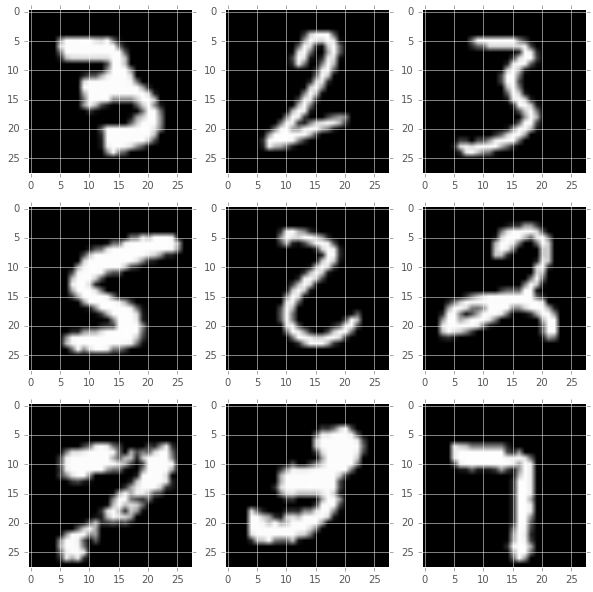

In [266]:
fig = plt.figure()
gs = gridspec.GridSpec(3, 3)
fig.set_size_inches(10,10)
ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(get_matrix_image_random(train), cmap='gray')
ax2 = fig.add_subplot(gs[0,-1])
ax2.imshow(get_matrix_image_random(train), cmap='gray')
ax3 = fig.add_subplot(gs[0,-2])
ax3.imshow(get_matrix_image_random(train), cmap='gray')
ax4 = fig.add_subplot(gs[-1,0])
ax4.imshow(get_matrix_image_random(train), cmap='gray')
ax5 = fig.add_subplot(gs[-1,-1])
ax5.imshow(get_matrix_image_random(train), cmap='gray')
ax6 = fig.add_subplot(gs[-1,-2])
ax6.imshow(get_matrix_image_random(train), cmap='gray')
ax7 = fig.add_subplot(gs[-2,0])
ax7.imshow(get_matrix_image_random(train), cmap='gray')
ax8 = fig.add_subplot(gs[-2,-1])
ax8.imshow(get_matrix_image_random(train), cmap='gray')
ax9 = fig.add_subplot(gs[-2,-2])
ax9.imshow(get_matrix_image_random(train), cmap='gray')

On peut ensuite commencer à créer un réseau de neuronnes très simple. Il comportera 5 couches de 2 perceptrons. On peut très facilement modifier les paramètres de ces réseaux de neuronnes. Il faut quand même faire attention  à la complexité des algorithmes. En effet, l'implémentation proposée par scikit learn utilise uniquement de la mémoire RAM ce qui peut être très vite assez limité. D'autres implémentations plus performantes utilsent la GPU pour effectuer des prédictions sur des ensembles de données plus importants. 

In [274]:
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 2),random_state=1)

clf.fit(X, y)  
clf.predict([[2., 2.], [-1., -2.]])

/opt/conda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


array([1, 0])

In [62]:
X = train.drop("label" , axis = 1)
y = train.label

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [67]:
clf = MLPClassifier(random_state=1)

In [68]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [70]:
predict = clf.predict(X_test)

In [71]:
Counter(predict)

Counter({0: 1051,
         1: 1114,
         2: 1019,
         3: 1121,
         4: 1027,
         5: 857,
         6: 1052,
         7: 1071,
         8: 1065,
         9: 1123})

## Performances sur l'ensemble de test

In [72]:
from sklearn.metrics import classification_report
print(classification_report(predict, y_test))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1051
          1       0.98      0.98      0.98      1114
          2       0.93      0.97      0.95      1019
          3       0.96      0.92      0.94      1121
          4       0.93      0.96      0.94      1027
          5       0.92      0.97      0.94       857
          6       0.98      0.97      0.98      1052
          7       0.95      0.95      0.95      1071
          8       0.93      0.93      0.93      1065
          9       0.95      0.91      0.93      1123

avg / total       0.95      0.95      0.95     10500



## Performances sur l'ensemble d'apprentissage

In [49]:
print(classification_report(clf.predict(X_train), y_train))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      3066
          1       0.99      1.00      1.00      3517
          2       0.99      0.99      0.99      3133
          3       0.98      0.99      0.99      3280
          4       0.99      0.99      0.99      3044
          5       0.98      0.99      0.99      2847
          6       1.00      0.98      0.99      3155
          7       0.98      1.00      0.99      3166
          8       0.97      0.98      0.98      3020
          9       0.99      0.96      0.98      3272

avg / total       0.99      0.99      0.99     31500



In [75]:
from pylab import imshow, rand

In [79]:
X_plot = X_test.copy()

X_plot["label"] = y_test
X_plot["predict"] = predict

In [90]:
X_error.shape[0]/X_plot.shape[0]

0.04876190476190476

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")

In [115]:
len(X_error.label.value_counts())

10

On peut essayer d'afficher quels sont les chiffres les mieux ou les moins bien classifié avec un histogram représentant le taux de bonne classification. Comme les différentes classes sont assez équitablement réparties on peut se permettre de ne pas normaliser les données pour conserver une compréhension du nombre de mauvaise classification.

In [185]:
X_error = X_plot[X_plot.label != X_plot.predict]

(0, 9)

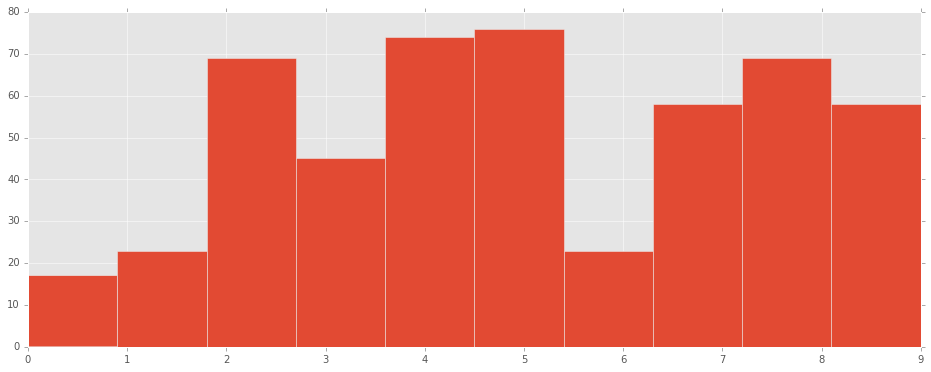

In [186]:
fig, ax = plt.subplots()
fig.set_size_inches(16,6)
ax.hist(X_error.label)
ax.set_xlim(0, 9)

On peut voir ici que les 0 et 1 et les 6 sont très bien classifiés dans l'ensemble. Il y a plus de problèmes sur les autres classes. 

In [187]:
from random import randint

In [188]:
n_elemtn = X_error.shape[0]
n_elemtn

512

On peut ensuite essayer de comprendre quels sont les chiffres prédits par rapport à l'image. Il est plus ou moins évident de comprendre "pourquoi" il a pu se tromper.

9


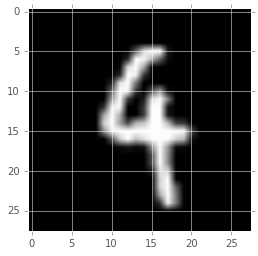

In [189]:
int_to_plot = randint(0,n_elemtn)
imshow(np.array(X_error.drop(['label', "predict"], axis=1).iloc[int_to_plot]).reshape(28,28), cmap='gray')
print(X_error.iloc[int_to_plot]["predict"])

6


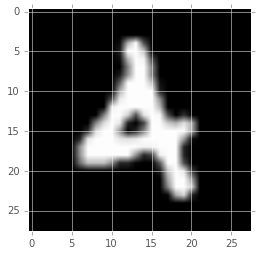

In [190]:
int_to_plot = randint(0,n_elemtn)
imshow(np.array(X_error.drop(['label', "predict"], axis=1).iloc[int_to_plot]).reshape(28,28), cmap='gray')
print(X_error.iloc[int_to_plot]["predict"])

7


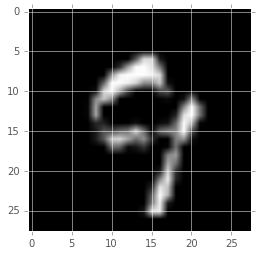

In [191]:
int_to_plot = randint(0,n_elemtn)
imshow(np.array(X_error.drop(['label', "predict"], axis=1).iloc[int_to_plot]).reshape(28,28), cmap='gray')
print(X_error.iloc[int_to_plot]["predict"])

8


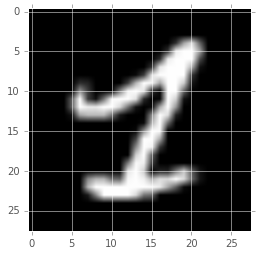

In [192]:
int_to_plot = randint(0,n_elemtn)
imshow(np.array(X_error.drop(['label', "predict"], axis=1).iloc[int_to_plot]).reshape(28,28), cmap='gray')
print(X_error.iloc[int_to_plot]["predict"])

In [193]:
X_error["val_combination"] = X_error.label.apply(str) + "," +  X_error.predict.apply(str)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [203]:
matrix = np.zeros((10,10))

In [204]:
values = X_error["val_combination"].value_counts()
for ind in values.index:
    i = int(ind.split(",")[0])
    j = int(ind.split(",")[1])
    matrix[i][j] = values[ind]
    

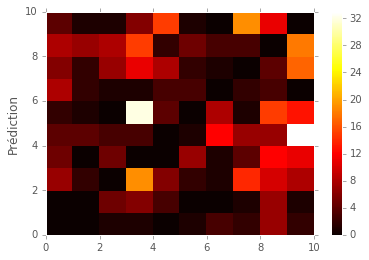

In [214]:
#plt.imshow(matrix, cmap='hot', interpolation='nearest')
heatmap = plt.pcolor(matrix, cmap="hot")
plt.colorbar(heatmap)
plt.ylabel("Label")
plt.ylabel("Prédiction")
plt.show()

On voit ici que les 3 sont souvent associés a des 5 et des 2 et que les 9 sont souvent associés a des 4 et des 8. Nous avons aussi les 

In [215]:
X_error["val_combination"].value_counts(dropna=False)[0:5]

4,9    33
5,3    32
9,7    19
2,3    19
8,9    18
Name: val_combination, dtype: int64

On voit ici les plus mauvaises classifications triées par ordre décroissant. 

## Test en mélangeant les labels permettant l'apprentissage

In [236]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [218]:
clf = MLPClassifier(random_state=1)

In [222]:
import random

In [237]:
y_train_shuffled = y_train.values.copy()
np.random.shuffle(y_train_shuffled)

In [238]:
clf.fit(X_train,y_train_shuffled)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [239]:
predict = clf.predict(X_test)

In [240]:
from collections import Counter
Counter(predict)

Counter({0: 27,
         1: 10309,
         2: 37,
         3: 37,
         4: 10,
         5: 9,
         6: 23,
         7: 20,
         8: 11,
         9: 17})

## Performances sur l'ensemble de test

In [241]:
from sklearn.metrics import classification_report
print(classification_report(predict, y_test))

             precision    recall  f1-score   support

          0       0.00      0.15      0.01        27
          1       0.97      0.11      0.20     10309
          2       0.00      0.11      0.01        37
          3       0.00      0.08      0.01        37
          4       0.00      0.10      0.00        10
          5       0.00      0.11      0.00         9
          6       0.00      0.09      0.00        23
          7       0.00      0.00      0.00        20
          8       0.00      0.00      0.00        11
          9       0.00      0.06      0.00        17

avg / total       0.96      0.11      0.19     10500



## Performances sur l'ensemble d'apprentissage

In [242]:
print(classification_report(clf.predict(X_train), y_train))

             precision    recall  f1-score   support

          0       0.00      0.03      0.00        80
          1       0.97      0.11      0.20     31080
          2       0.00      0.08      0.00        49
          3       0.00      0.06      0.00        84
          4       0.00      0.23      0.01        48
          5       0.00      0.23      0.00        31
          6       0.00      0.05      0.00        39
          7       0.00      0.17      0.00        42
          8       0.00      0.00      0.00        19
          9       0.00      0.07      0.00        28

avg / total       0.96      0.11      0.20     31500

